In [28]:
from sympy import symbols
from sympy.physics.mechanics import *

In [29]:
n = 2  # number of pendulums

In [30]:
q = dynamicsymbols('q:' + str(n + 1))  # Generalized coordinates
u = dynamicsymbols('u:' + str(n + 1))  # Generalized speeds
f = dynamicsymbols('f')                # Force applied to the cart

m = symbols('m:' + str(n + 1))         # Mass of each bob
l = symbols('l:' + str(n))             # Length of each link
g, t = symbols('g t')                  # Gravity and time

In [31]:
I = ReferenceFrame('I')                # Inertial reference frame
O = Point('O')                         # Origin point
O.set_vel(I, 0)                        # Origin's velocity is zero

In [32]:
P0 = Point('P0')                       # Hinge point of top link
P0.set_pos(O, q[0] * I.x)              # Set the position of P0    
P0.set_vel(I, u[0] * I.x)              # Set the velocity of P0
Pa0 = Particle('Pa0', P0, m[0])        # Define a particle at P0

In [33]:
frames = [I]                              # List to hold the n + 1 frames
points = [P0]                             # List to hold the n + 1 points
particles = [Pa0]                         # List to hold the n + 1 particles
forces = [(P0, f * I.x - m[0] * g * I.y)] # List to hold the n + 1 applied forces, including the input force, f
kindiffs = [q[0].diff(t) - u[0]]          # List to hold kinematic ODE's

for i in range(n):
    Bi = I.orientnew('B' + str(i), 'Axis', [q[i + 1], I.z])   # Create a new frame
    Bi.set_ang_vel(I, u[i + 1] * I.z)                         # Set angular velocity
    frames.append(Bi)                                         # Add it to the frames list

    Pi = points[-1].locatenew('P' + str(i + 1), l[i] * Bi.x)  # Create a new point
    Pi.v2pt_theory(points[-1], I, Bi)                         # Set the velocity
    points.append(Pi)                                         # Add it to the points list

    Pai = Particle('Pa' + str(i + 1), Pi, m[i + 1])           # Create a new particle
    particles.append(Pai)                                     # Add it to the particles list

    forces.append((Pi, -m[i + 1] * g * I.y))                  # Set the force applied at the point

    kindiffs.append(q[i + 1].diff(t) - u[i + 1])              # Define the kinematic ODE:  dq_i / dt - u_i = 0

In [34]:
kane = KanesMethod(I, q_ind=q, u_ind=u, kd_eqs=kindiffs) # Initialize the object
fr, frstar = kane.kanes_equations(particles, forces)     # Generate EoM's fr + frstar = 0

In [35]:
fr

Matrix([
[                                    f(t)],
[-g*l0*m1*cos(q1(t)) - g*l0*m2*cos(q1(t))],
[                     -g*l1*m2*cos(q2(t))]])

In [36]:
frstar

Matrix([
[                                 l0*m1*u1(t)**2*cos(q1(t)) + l0*m2*u1(t)**2*cos(q1(t)) + l1*m2*u2(t)**2*cos(q2(t)) + l1*m2*sin(q2(t))*Derivative(u2(t), t) - (-l0*m1*sin(q1(t)) - l0*m2*sin(q1(t)))*Derivative(u1(t), t) - (m0 + m1 + m2)*Derivative(u0(t), t)],
[-l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)))*Derivative(u2(t), t) + l0*l1*m2*(-sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))*u2(t)**2 - (l0**2*m1 + l0**2*m2)*Derivative(u1(t), t) - (-l0*m1*sin(q1(t)) - l0*m2*sin(q1(t)))*Derivative(u0(t), t)],
[                                    -l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)))*Derivative(u1(t), t) + l0*l1*m2*(sin(q1(t))*cos(q2(t)) - sin(q2(t))*cos(q1(t)))*u1(t)**2 - l1**2*m2*Derivative(u2(t), t) + l1*m2*sin(q2(t))*Derivative(u0(t), t)]])

In [37]:
kane.mass_matrix

Matrix([
[                        m0 + m1 + m2,                     -l0*m1*sin(q1(t)) - l0*m2*sin(q1(t)),                                        -l1*m2*sin(q2(t))],
[-l0*m1*sin(q1(t)) - l0*m2*sin(q1(t)),                                      l0**2*m1 + l0**2*m2, l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)))],
[                   -l1*m2*sin(q2(t)), l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t))),                                                 l1**2*m2]])

In [38]:
kane.forcing

Matrix([
[                     l0*m1*u1(t)**2*cos(q1(t)) + l0*m2*u1(t)**2*cos(q1(t)) + l1*m2*u2(t)**2*cos(q2(t)) + f(t)],
[-g*l0*m1*cos(q1(t)) - g*l0*m2*cos(q1(t)) + l0*l1*m2*(-sin(q1(t))*cos(q2(t)) + sin(q2(t))*cos(q1(t)))*u2(t)**2],
[                      -g*l1*m2*cos(q2(t)) + l0*l1*m2*(sin(q1(t))*cos(q2(t)) - sin(q2(t))*cos(q1(t)))*u1(t)**2]])

In [39]:
linearizer = kane.to_linearizer()

In [40]:
M, A, B = linearizer.linearize()

M

Matrix([
[1, 0, 0,                                   0,                                                         0,                                                         0],
[0, 1, 0,                                   0,                                                         0,                                                         0],
[0, 0, 1,                                   0,                                                         0,                                                         0],
[0, 0, 0,                       -m0 - m1 - m2,                       l0*m1*sin(q1(t)) + l0*m2*sin(q1(t)),                                          l1*m2*sin(q2(t))],
[0, 0, 0, l0*m1*sin(q1(t)) + l0*m2*sin(q1(t)),                                      -l0**2*m1 - l0**2*m2, -l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t)))],
[0, 0, 0,                    l1*m2*sin(q2(t)), -l0*l1*m2*(sin(q1(t))*sin(q2(t)) + cos(q1(t))*cos(q2(t))),                                                 -l1**2*

In [41]:
A

Matrix([
[0,                                                                                                                                                                                                                                                           0,                                                                                                                                                                                                                0, 1,                                                                 0,                                                                  0],
[0,                                                                                                                                                                                                                                                           0,                                                                                                                                 

In [42]:
B

Matrix([
[ 0],
[ 0],
[ 0],
[-1],
[ 0],
[ 0]])

In [43]:
from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi, ones
from numpy.linalg import solve
from scipy.integrate import odeint

In [44]:
arm_length = 1. / n                          # The maximum length of the pendulum is 1 meter
bob_mass = 0.01 / n                          # The maximum mass of the bobs is 10 grams
parameters = [g, m[0]]                       # Parameter definitions starting with gravity and the first bob
parameter_vals = [9.81, 0.01 / n]            # Numerical values for the first two
for i in range(n):                           # Then each mass and length
    parameters += [l[i], m[i + 1]]
    parameter_vals += [arm_length, bob_mass]

In [45]:
dynamic = q + u                                                # Make a list of the states
dynamic.append(f)                                              # Add the input force
dummy_symbols = [Dummy() for i in dynamic]                     # Create a dummy symbol for each variable
dummy_dict = dict(zip(dynamic, dummy_symbols))
kindiff_dict = kane.kindiffdict()                              # Get the solved kinematical differential equations
M = kane.mass_matrix_full.subs(kindiff_dict).subs(dummy_dict)  # Substitute into the mass matrix 
F = kane.forcing_full.subs(kindiff_dict).subs(dummy_dict)      # Substitute into the forcing vector
M_func = lambdify(dummy_symbols + parameters, M)               # Create a callable function to evaluate the mass matrix 
F_func = lambdify(dummy_symbols + parameters, F)               # Create a callable function to evaluate the forcing vector

In [46]:
def right_hand_side(x, t, args):
    """Returns the derivatives of the states.

    Parameters
    ----------
    x : ndarray, shape(2 * (n + 1))
        The current state vector.
    t : float
        The current time.
    args : ndarray
        The constants.

    Returns
    -------
    dx : ndarray, shape(2 * (n + 1))
        The derivative of the state.
    
    """
    u = 0.0                              # The input force is always zero     
    arguments = hstack((x, u, args))     # States, input, and parameters
    dx = array(solve(M_func(*arguments), # Solving for the derivatives
        F_func(*arguments))).T[0]

    return dx

In [47]:
x0 = hstack(( 0, pi / 2 * ones(len(q) - 1), 1e-3 * ones(len(u)) )) # Initial conditions, q and u
t = linspace(0, 10, 1000)                                          # Time vector
y = odeint(right_hand_side, x0, t, args=(parameter_vals,))         # Actual integration

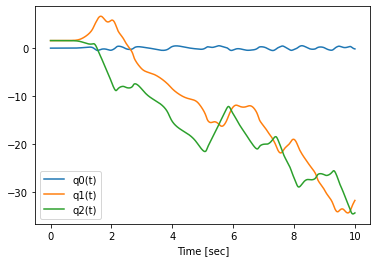

In [48]:
from matplotlib.pyplot import *

lines = plot(t, y[:, :y.shape[1] // 2])
lab = xlabel('Time [sec]')
leg = legend(dynamic[:y.shape[1] // 2])

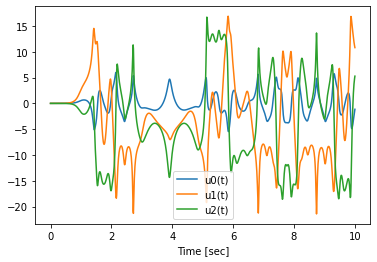

In [49]:
lines = plot(t, y[:, y.shape[1] // 2:])
lab = xlabel('Time [sec]')
leg = legend(dynamic[y.shape[1] // 2:])

In [50]:
# from numpy import zeros, cos, sin, arange, around
# from matplotlib import pyplot as plt
# from matplotlib import animation
# from matplotlib.patches import Rectangle

In [51]:
# def animate_pendulum(t, states, length, filename=None):
#     """Animates the n-pendulum and optionally saves it to file.

#     Parameters
#     ----------
#     t : ndarray, shape(m)
#         Time array.
#     states: ndarray, shape(m,p)
#         State time history.
#     length: float
#         The length of the pendulum links.
#     filename: string or None, optional
#         If true a movie file will be saved of the animation. This may take some time.

#     Returns
#     -------
#     fig : matplotlib.Figure
#         The figure.
#     anim : matplotlib.FuncAnimation
#         The animation.

#     """
#     # the number of pendulum bobs
#     numpoints = states.shape[1] / 2

#     # first set up the figure, the axis, and the plot elements we want to animate
#     fig = plt.figure()

#     # some dimesions
#     cart_width = 0.4
#     cart_height = 0.2

#     # set the limits based on the motion
#     xmin = around(states[:, 0].min() - cart_width / 2.0, 1)
#     xmax = around(states[:, 0].max() + cart_width / 2.0, 1)

#     # create the axes
#     ax = plt.axes(xlim=(xmin, xmax), ylim=(-1.1, 1.1), aspect='equal')

#     # display the current time
#     time_text = ax.text(0.04, 0.9, '', transform=ax.transAxes)

#     # create a rectangular cart
#     rect = Rectangle([states[0, 0] - cart_width / 2.0, -cart_height / 2],
#         cart_width, cart_height, fill=True, color='red', ec='black')
#     ax.add_patch(rect)

#     # blank line for the pendulum
#     line, = ax.plot([], [], lw=2, marker='o', markersize=6)

#     # initialization function: plot the background of each frame
#     def init():
#         time_text.set_text('')
#         rect.set_xy((0.0, 0.0))
#         line.set_data([], [])
#         return time_text, rect, line,

#     # animation function: update the objects
#     def animate(i):
#         time_text.set_text('time = {:2.2f}'.format(t[i]))
#         rect.set_xy((states[i, 0] - cart_width // 2.0, -cart_height // 2))
#         x = hstack((states[i, 0], zeros((numpoints - 1))))
#         y = zeros((numpoints))
#         for j in arange(1, numpoints):
#             x[j] = x[j - 1] + length * cos(states[i, j])
#             y[j] = y[j - 1] + length * sin(states[i, j])
#         line.set_data(x, y)
#         return time_text, rect, line,

#     # call the animator function
#     anim = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init,
#             interval=t[-1] / len(t) * 1000, blit=True, repeat=False)

#     # save the animation if a filename is given
#     if filename is not None:
#         anim.save(filename, fps=30, codec='libx264')


In [52]:
# animate_pendulum(t, y, arm_length, filename="open-loop.ogv")
# animate_pendulum(t, y, arm_length, filename="open-loop.mp4")

In [53]:
# from IPython.display import HTML, display
# h = "./open-loop.mp4"
# """
# <video width="640" height="480" controls>
#   <source src="files/open-loop.ogv" type="video/ogg">
#   <source src="files/open-loop.mp4" type="video/mp4">
# Your browser does not support the video tag, check out the YouTuve version instead: http://youtu.be/Nj3_npq7MZI.
# </video>
# """
# display(HTML(h, metadata=dict(isolated=True)))